### Install libraries

In [1]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Libraries for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#### Download the stopwords dataset

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Load the dataset

In [4]:
df = pd.read_csv("spam.csv",encoding='latin-1')

# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data preprocessing
#### Drop unnecessary columns from the DataFrame

In [5]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the dataset
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Consice information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Find missing values

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

#### Check columns name

In [9]:
df.columns

Index(['v1', 'v2'], dtype='object')

#### Rename the columns "v1 and "v2" to new names

In [10]:
new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

# Display the first few rows of the dataset
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


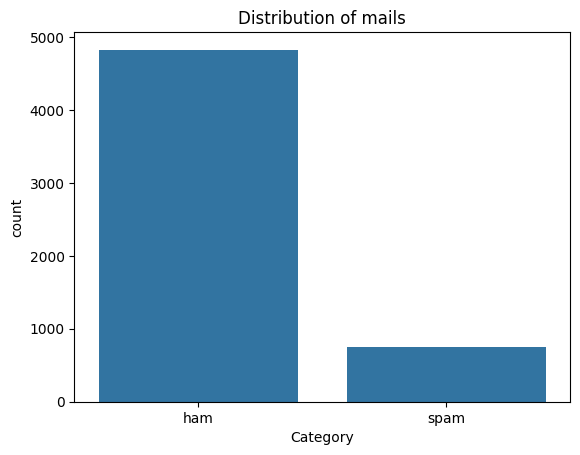

In [11]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

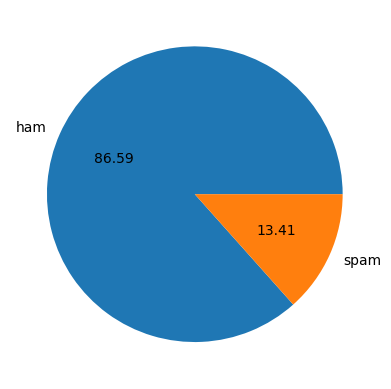

In [12]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [13]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

#### Separate the feature (message) and target (category) data

In [14]:
X = df["Message"]
Y = df["Category"]

In [15]:
print(X)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [16]:
print(Y)


0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


#### Split data into training and testing sets

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

# Print the shape of X
print(X.shape)

# Print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


#### Initialize TF-IDF Vectorizer

In [18]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

#### Feature extraction for training and testing data

In [19]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#### Convert Y_train and Y_test to integer type

In [20]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

#### Apply SMOTE to balance the training data

In [21]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_features, Y_train)

In [22]:
X_train

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object

In [23]:
X_train_features


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34758 stored elements and shape (4457, 7510)>

### Build Logistic Regression model

The process of building a Logistic Regression model for spam email classification involves the following steps:

1. **Initialization**: Create a Logistic Regression model using the `LogisticRegression` class from the `sklearn` library.  

2. **Training**: Train the Logistic Regression model and fit it on the features and labels from the preprocessed data.

3. **Evaluation**: Evaluate the model's performance on the test dataset by calculating key metrics such as accuracy, precision, recall, and F1-score. Additionally, generate a confusion matrix to visualize the classification results and identify areas for improvement.


In [24]:
lr_model = LogisticRegression()
# lr_model.fit(X_train_features, Y_train)
lr_model.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

In [ ]:
predict_train_data=lr_model.predict(X_train_features)

accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9925959165357864


In [26]:
# #Make predictions on the train data
predict_train_data=lr_model.predict(X_train_features)

#Model Evaluation
# print("Classification Report is:\n",classification_report(Y_test,predict_train_data))
# print("Confusion Matrix:\n",confusion_matrix(Y_test,predict_train_data))
print("Training Score:\n",round(accuracy_score(Y_train,predict_train_data)*100, 3))

Training Score:
 99.26


In [27]:
# Make predictions on the testing data
predict_test_data=lr_model.predict(X_test_features)

#Model Evaluation
print("Classification Report is:\n",classification_report(Y_test,predict_test_data))
print("Confusion Matrix:\n",confusion_matrix(Y_test,predict_test_data))
print("Training Score:\n",accuracy_score(Y_train,predict_train_data)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       155
           1       0.98      0.99      0.99       960

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[140  15]
 [  6 954]]
Training Score:
 99.25959165357864


In [32]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': predict_test_data})
data

,Actual,Predicted
2632,1,1
454,0,0
983,1,1
1282,1,1
4610,1,1
...,...,...
4827,1,1
5291,1,1
3325,1,1
3561,1,1


In [28]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=lr_model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


### Improving the Model with Random Forest

Improving the Model with Random Forest follows by the steps below:

1. **Initialization**: A `RandomForestClassifier` is initialized using the `sklearn` library with default hyperparameters to ensure simplicity and reproducibility.

2. **Training**: The model is trained on the resampled training dataset (`X_train_resampled`, `Y_train_resampled`) to account for class imbalance. The training process involves fitting the Random Forest model on the features and labels.

3. **Evaluation**: Predictions are made on both the training and test datasets to evaluate the model's accuracy. Key metrics such as precision, recall, and F1-score are calculated, and a confusion matrix is generated to visualize the classification results.


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, Y_train_resampled)

#Make predictions on the training data
predict_train_data=rf_model.predict(X_train_features)

#Model Evaluation
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)


print("Classification Report is:\n",classification_report(Y_test,predict_test_data))
print("Confusion Matrix:\n",confusion_matrix(Y_test,predict_test_data))
print("Training Score:\n",accuracy_score(Y_train,predict_train_data)*100)

Accuracy on training data:  1.0
Classification Report is:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       155
           1       0.98      0.99      0.99       960

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[140  15]
 [  6 954]]
Training Score:
 100.0


In [31]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': predict_test_data})
data

,Actual,Predicted
2632,1,1
454,0,0
983,1,1
1282,1,1
4610,1,1
...,...,...
4827,1,1
5291,1,1
3325,1,1
3561,1,1
